# Árvore de Decisão

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

## Dados do dataset de veículos

buying   - buying price
maint    - price of the maintenance
doors    - number of doors
persons  - capacity in terms of persons to carry
lug_boot - the size of luggage boot
safety   - estimated safety of the car
class    - classification of car

Attribute Values:

buying       v-high, high, med, low
maint        v-high, high, med, low
doors        2, 3, 4, 5-more
persons      2, 4, more
lug_boot     small, med, big
safety       low, med, high
class        unacc, acc, good, v-good

Base disponível em: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [2]:
df = pd.read_csv('car.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# Transformar os campos para chaves
le_buying = LabelEncoder()
le_maint = LabelEncoder()
le_lug_boot = LabelEncoder()
le_safety = LabelEncoder()
le_class = LabelEncoder()
le_doors = LabelEncoder()
le_persons = LabelEncoder()

df['buying_n'] = le_buying.fit_transform(df['buying'])
df['maint_n'] = le_maint.fit_transform(df['maint'])
df['lug_boot_n'] = le_lug_boot.fit_transform(df['lug_boot'])
df['safety_n'] = le_safety.fit_transform(df['safety'])
df['class_n'] = le_class.fit_transform(df['class'])
df['doors_n'] = le_doors.fit_transform(df['doors'])
df['persons_n'] = le_persons.fit_transform(df['persons'])
df.head(1000)

,buying,maint,doors,persons,lug_boot,safety,class,buying_n,maint_n,lug_boot_n,safety_n,class_n,doors_n,persons_n
0,vhigh,vhigh,2,2,small,low,unacc,3,3,2,1,2,0,0
1,vhigh,vhigh,2,2,small,med,unacc,3,3,2,2,2,0,0
2,vhigh,vhigh,2,2,small,high,unacc,3,3,2,0,2,0,0
3,vhigh,vhigh,2,2,med,low,unacc,3,3,1,1,2,0,0
4,vhigh,vhigh,2,2,med,med,unacc,3,3,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,med,high,2,more,med,high,acc,2,0,1,0,0,0,2
996,med,high,2,more,big,low,unacc,2,0,0,1,2,0,2
997,med,high,2,more,big,med,acc,2,0,0,2,0,0,2
998,med,high,2,more,big,high,acc,2,0,0,0,0,0,2


In [4]:
# Qual o objetivo? Por exemplo, comprar um carro de baixo custo.

objetivo = pd.Series(np.where(df['buying_n']<=1, 1, 0))
print(objetivo)

0       0
1       0
2       0
3       0
4       0
       ..
1723    1
1724    1
1725    1
1726    1
1727    1
Length: 1728, dtype: int32


In [7]:
# Gerar novo DataFrame com os dados necessários
entradas = df.drop(['buying','maint','lug_boot','safety','doors','persons','class'], axis='columns')
entradas.head()

,buying_n,maint_n,lug_boot_n,safety_n,class_n,doors_n,persons_n
0,3,3,2,1,2,0,0
1,3,3,2,2,2,0,0
2,3,3,2,0,2,0,0
3,3,3,1,1,2,0,0
4,3,3,1,2,2,0,0


In [12]:
# Treinar o modelo
model = tree.DecisionTreeClassifier()
model.fit(entradas, objetivo)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
model.score(entradas, objetivo)

1.0

In [14]:
# buying, maint, lug_boot, safety, class, doors, persons
model.predict([[1, 1, 1, 1, 1, 1, 1]])

array([1])

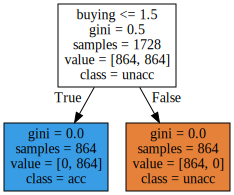

In [15]:
import graphviz

dot_data = tree.export_graphviz(model, feature_names=['buying','maint','lug_boot','safety','class','doors','persons'],class_names=['unacc','acc','good','v-good'], out_file=None, filled=True)  
graph=graphviz.Source(dot_data)
graph